# Visão Computacional e Deep Learning para Sensoriamento Remoto com Python


# Capítulo 07 - Recentes Arquiteturas de CNNs para Classificação de Imagens

## Transfer Learning

O transfer laerning trata de alavancar as representações de recursos de um modelo pré-treinado, para que você não precise treinar um novo modelo do zero.

Os modelos pré-treinados geralmente são treinados em conjuntos de dados massivos que são uma referência padrão na fronteira da visão computacional. Os pesos obtidos dos modelos podem ser reutilizados em outras tarefas de visão computacional.

Esses modelos podem ser usados diretamente para fazer previsões sobre novas tarefas ou integrados ao processo de treinamento de um novo modelo. Incluir os modelos pré-treinados em um novo modelo leva a um menor tempo de treinamento e menor erro de generalização.

O aprendizado por transferência é particularmente útil quando você tem um pequeno conjunto de dados de treinamento. Nesse caso, você pode, por exemplo, usar os pesos dos modelos pré-treinados para inicializar os pesos do novo modelo. Como você verá mais adiante, o aprendizado por transferência também pode ser aplicado a problemas de processamento de linguagem natural.

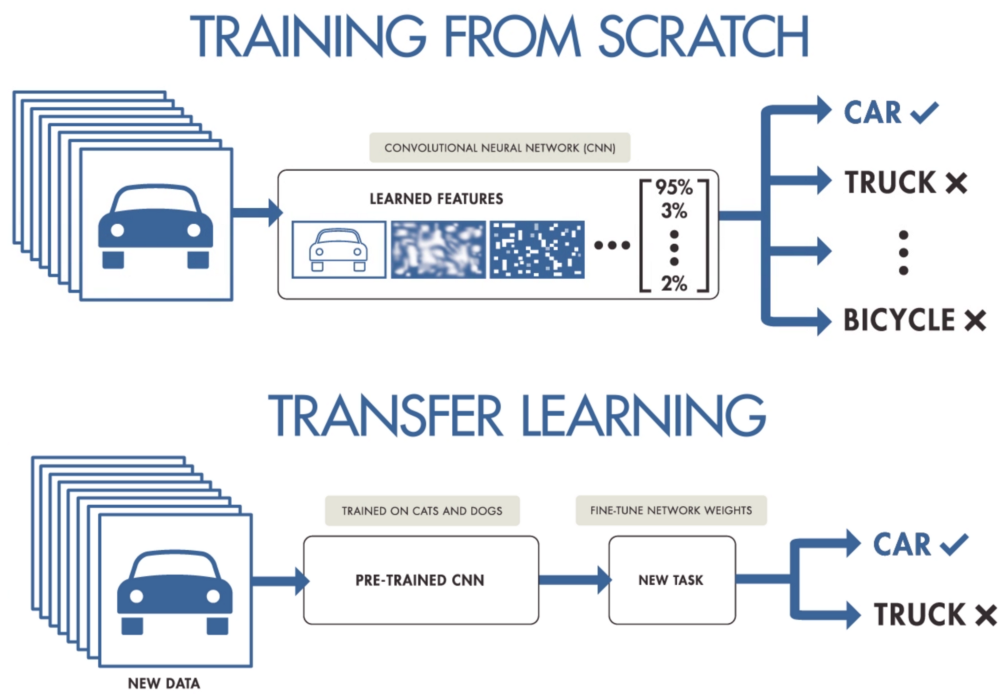

A vantagem dos modelos pré-treinados é que eles são genéricos o suficiente para uso em outros aplicativos do mundo real. Por exemplo:

modelos treinados no ImageNet podem ser usados em problemas de classificação de imagens do mundo real. Isso ocorre porque o conjunto de dados contém mais de 1.000 classes. Digamos que você seja um pesquisador de insetos. Você pode usar esses modelos e ajustá-los para classificar insetos.

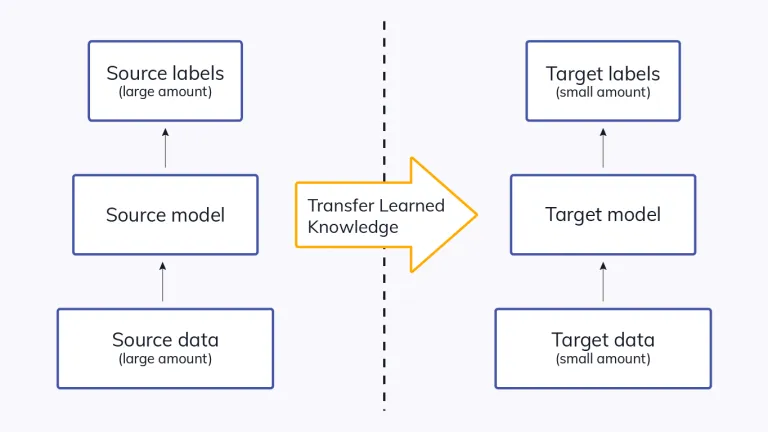

Podemos usar o modelo pré-treinado em diferentes situações:

- Classificador: O modelo pré-treinado é usado diretamente para classificar novas imagens.
- Extrator de recursos autônomo: o modelo pré-treinado, ou parte do modelo, é usado para pré-processar imagens e extrair recursos relevantes.
- Extrator de recursos integrado: o modelo pré-treinado, ou alguma parte do modelo, é integrado a um novo modelo, mas as camadas do modelo pré-treinado são congeladas durante o treinamento.
- Inicialização de Peso: O modelo pré-treinado, ou alguma parte do modelo, é integrado a um novo modelo, e as camadas do modelo pré-treinado são treinadas em conjunto com o novo modelo.

Cada abordagem pode ser eficaz e economizar tempo significativo no desenvolvimento e treinamento de um modelo de rede neural convolucional profunda.

## Caso de Uso: Classificação de imagens de alta resolução

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pandas as pd
from pylab import rcParams
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 18, 6

Vamos usar o conjunto de dados AID neste exemplo:

In [ ]:
path = 'drive/My Drive/Datasets/AID'

In [ ]:
class_list = os.listdir(path)

Existem 30 classes diferentes de imagens 600x600, porém, usaremos apenas 5 classes:

In [ ]:
print(class_list)

['Desert', 'Commercial', 'Airport', 'BareLand', 'Church', 'Bridge', 'BaseballField', 'Beach', 'Center', 'DenseResidential', 'Mountain', 'MediumResidential', 'Farmland', 'Meadow', 'Park', 'Pond', 'Playground', 'Forest', 'Industrial', 'Parking', 'School', 'River', 'StorageTanks', 'Stadium', 'SparseResidential', 'RailwayStation', 'Port', 'Resort', 'Square', 'Viaduct']


In [ ]:
Y = []
X = []
n_cls = 3
i = 0
for i in range(n_cls):
  path_class = os.path.join(path,class_list[i])
  img_list = os.listdir(path_class)
  for n in range(len(img_list)):
    path_img = os.path.join(path_class,img_list[n])
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (300,300))
    print(str(n) + '_' + class_list[i])
    Y.append(i)
    X.append(img)

0_Desert
1_Desert
2_Desert
3_Desert
4_Desert
5_Desert
6_Desert
7_Desert
8_Desert
9_Desert
10_Desert
11_Desert
12_Desert
13_Desert
14_Desert
15_Desert
16_Desert
17_Desert
18_Desert
19_Desert
20_Desert
21_Desert
22_Desert
23_Desert
24_Desert
25_Desert
26_Desert
27_Desert
28_Desert
29_Desert
30_Desert
31_Desert
32_Desert
33_Desert
34_Desert
35_Desert
36_Desert
37_Desert
38_Desert
39_Desert
40_Desert
41_Desert
42_Desert
43_Desert
44_Desert
45_Desert
46_Desert
47_Desert
48_Desert
49_Desert
50_Desert
51_Desert
52_Desert
53_Desert
54_Desert
55_Desert
56_Desert
57_Desert
58_Desert
59_Desert
60_Desert
61_Desert
62_Desert
63_Desert
64_Desert
65_Desert
66_Desert
67_Desert
68_Desert
69_Desert
70_Desert
71_Desert
72_Desert
73_Desert
74_Desert
75_Desert
76_Desert
77_Desert
78_Desert
79_Desert
80_Desert
81_Desert
82_Desert
83_Desert
84_Desert
85_Desert
86_Desert
87_Desert
88_Desert
89_Desert
90_Desert
91_Desert
92_Desert
93_Desert
94_Desert
95_Desert
96_Desert
97_Desert
98_Desert
99_Desert
100_Desert

Depois de importar as imagens, converteremos a lista de imagens em um array numpy:

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(1010, 300, 300, 3)
(1010,)


In [ ]:
X.max()

255

(-0.5, 299.5, 299.5, -0.5)

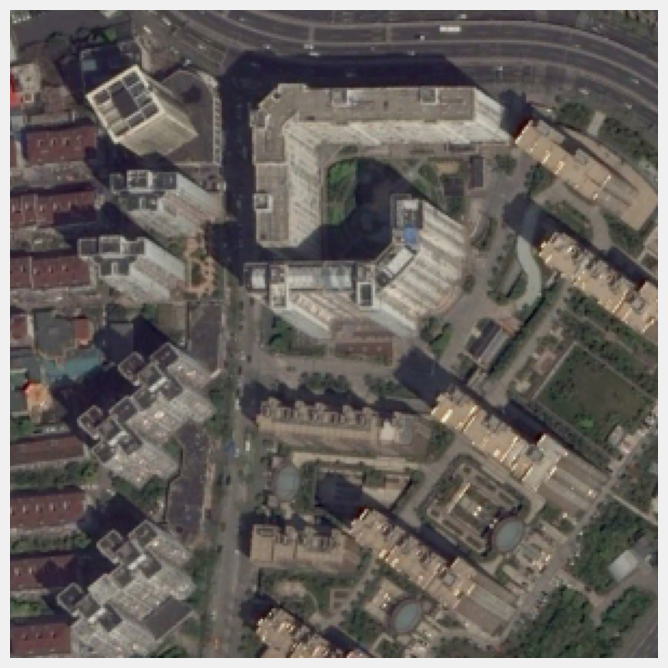

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(X[500])
plt.axis("off")

Vamos verificar os ids de cada classe e a quantidade de imagens por classe:

In [ ]:
classe, qtd =  np.unique(Y,return_counts=True)

In [ ]:
print(classe)
print(qtd)

[0 1 2]
[300 350 360]


Agora vamos formatar nossos dados de entrada e nossos dados de destino:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation

In [ ]:
Y = np_utils.to_categorical(Y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [ ]:
del X,Y

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

## Keras Applications

https://keras.io/api/applications/

Keras Applications são modelos de aprendizado profundo que são disponibilizados juntamente com pesos pré-treinados. Esses modelos podem ser usados para previsão, extração de recursos e ajuste fino.

Os pesos são baixados automaticamente ao instanciar um modelo. Eles são armazenados em ~/.keras/models/.

Após a instanciação, os modelos serão construídos de acordo com o formato de dados de imagem definido em seu arquivo de configuração do Keras em ~/.keras/keras.json. Por exemplo, se você definiu image_data_format=channels_last, qualquer modelo carregado deste repositório será construído de acordo com a convenção de formato de dados do TensorFlow, "Height-Width-Depth".

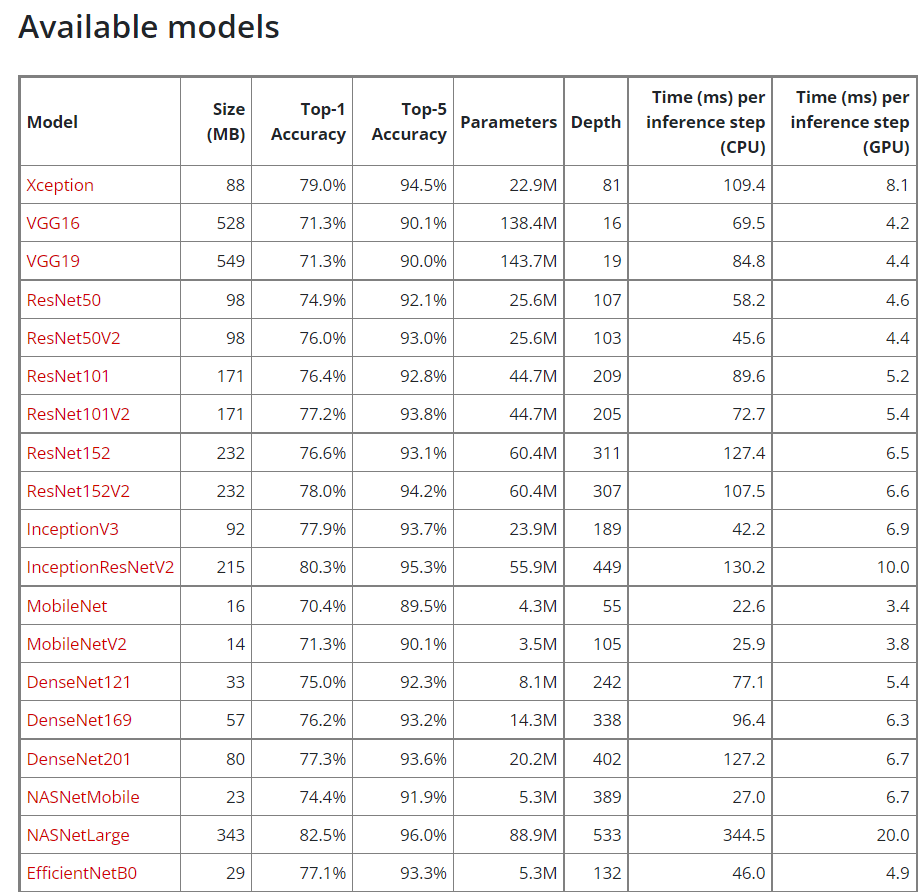

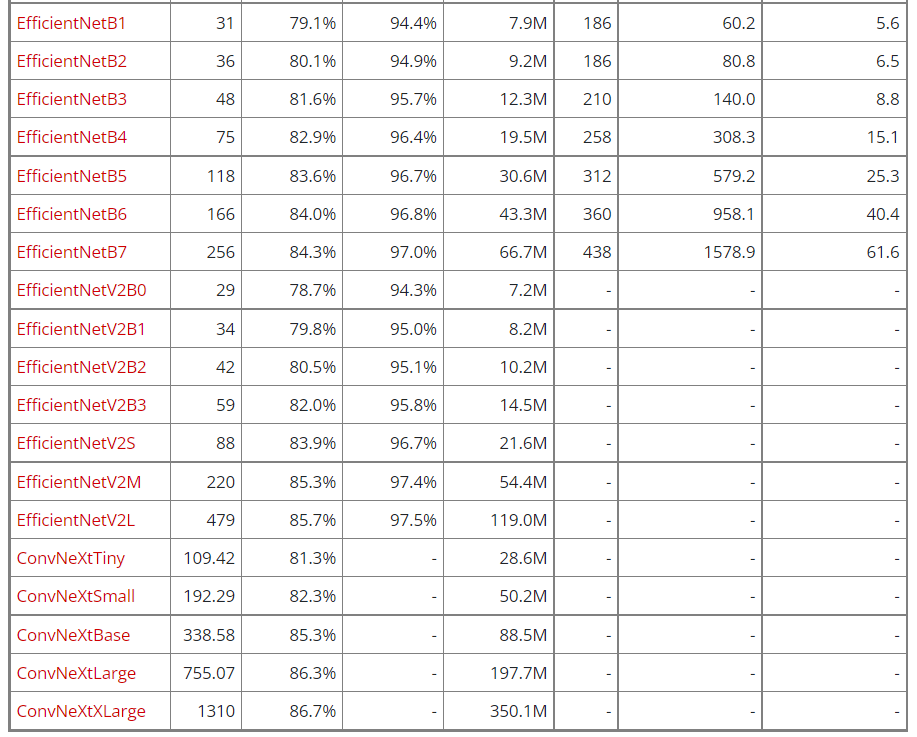

### DenseNet

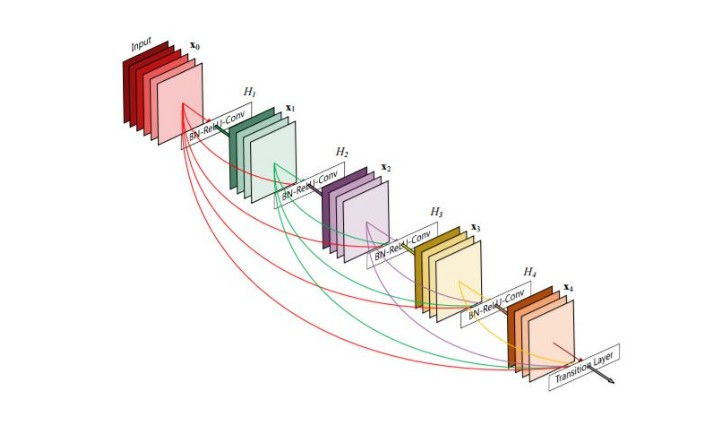

DenseNet é uma das novas descobertas em redes neurais para reconhecimento visual de objetos. O DenseNet é bastante semelhante ao ResNet com algumas diferenças fundamentais. O ResNet usa um método aditivo (+) que mescla a camada anterior (identidade) com a camada futura, enquanto o DenseNet concatena (.) a saída da camada anterior com a camada futura

O DenseNet foi desenvolvido especificamente para melhorar a precisão diminuída causada pelo gradiente de fuga em redes neurais de alto nível. Em termos mais simples, devido ao caminho mais longo entre a camada de entrada e a camada de saída, a informação desaparece antes de chegar ao seu destino.

Uma saída da camada anterior atua como uma entrada da segunda camada usando a operação de função composta. Essa operação composta consiste na camada de convolução, camada de pooling, normalização de lote e camada de ativação não linear.

Essas conexões significam que a rede possui L(L+1)/2 conexões diretas. L é o número de camadas na arquitetura.

A DenseNet possui diferentes versões, como DenseNet-121, DenseNet-160, DenseNet-201, etc. Os números denotam o número de camadas na rede neural.

Seja somando ou concatenando, o agrupamento de camadas pela equação acima só é possível se as dimensões do mapa de feições forem iguais. E se as dimensões forem diferentes? O DenseNet é dividido em DenseBlocks onde vários filtros são diferentes, mas as dimensões dentro do bloco são as mesmas. Camada de Transição aplica normalização em lote usando downsampling; é um passo essencial na CNN.

Vamos ver o que há dentro do DenseBlock e da camada de transição:

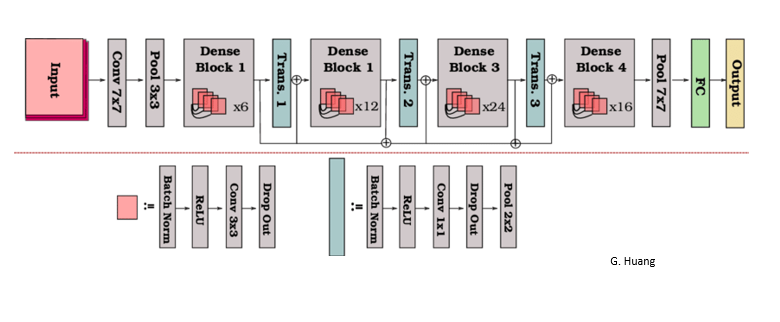

Vamos implementar Densenet usando Keras Applications e Tensoflow 2.0:

In [ ]:
from keras import backend as K
import tensorflow
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import Input
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
from keras.applications.densenet import DenseNet121

In [ ]:
new_input = Input(x_train.shape[1:])

In [ ]:
model = DenseNet121(weights=None, input_tensor=new_input, classes=3, classifier_activation="softmax")

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 306, 306, 3)  0          ['input_1[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 150, 150, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=8, epochs=100, validation_split=0.30)

Epoch 1/100
67/67 [==============================] - 79s 146ms/step - loss: 0.6734 - accuracy: 0.7221 - val_loss: 1.8399 - val_accuracy: 0.3246
Epoch 2/100
67/67 [==============================] - 7s 100ms/step - loss: 0.4930 - accuracy: 0.7958 - val_loss: 3.3535 - val_accuracy: 0.3596
Epoch 3/100
67/67 [==============================] - 7s 98ms/step - loss: 0.4614 - accuracy: 0.8185 - val_loss: 3.4401 - val_accuracy: 0.2632
Epoch 4/100
67/67 [==============================] - 7s 100ms/step - loss: 0.5201 - accuracy: 0.8204 - val_loss: 2.5998 - val_accuracy: 0.4561
Epoch 5/100
67/67 [==============================] - 7s 98ms/step - loss: 0.3849 - accuracy: 0.8544 - val_loss: 0.8378 - val_accuracy: 0.6711
Epoch 6/100
67/67 [==============================] - 7s 100ms/step - loss: 0.3410 - accuracy: 0.8677 - val_loss: 2.1561 - val_accuracy: 0.5307
Epoch 7/100
67/67 [==============================] - 7s 98ms/step - loss: 0.3130 - accuracy: 0.8866 - val_loss: 1.2665 - val_accuracy: 0.6930
E

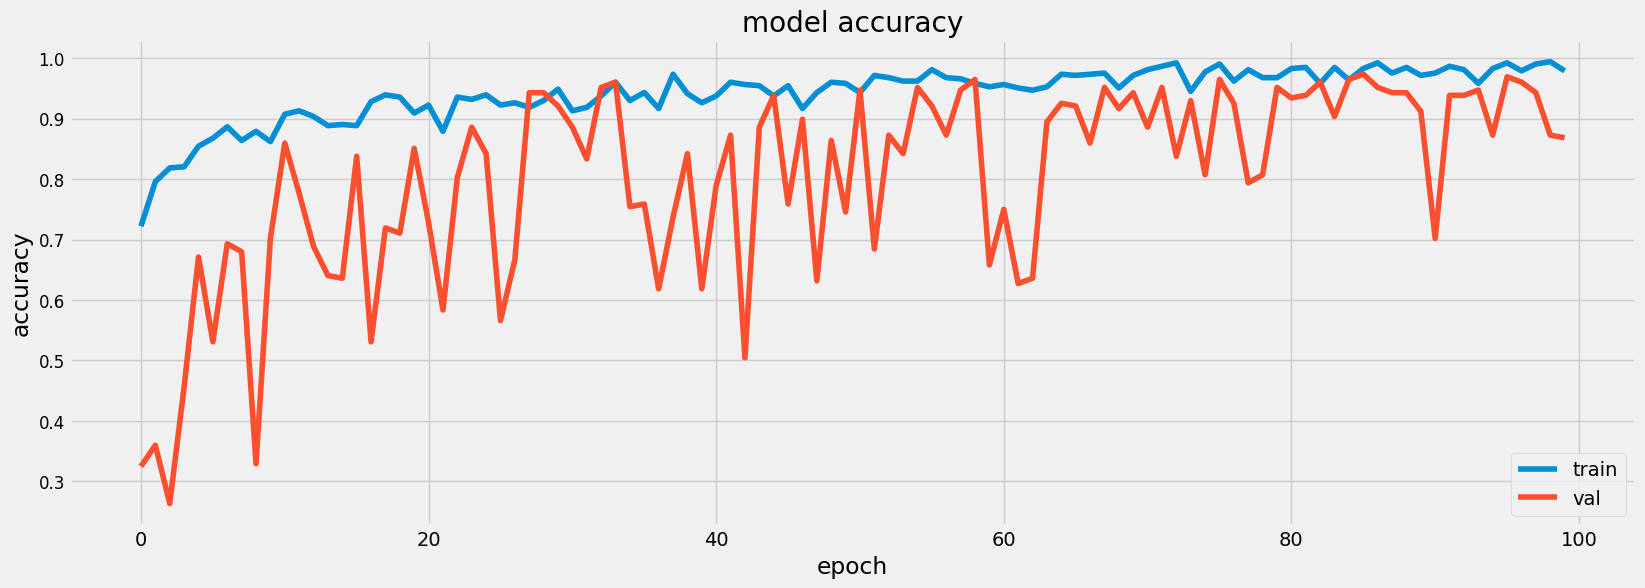

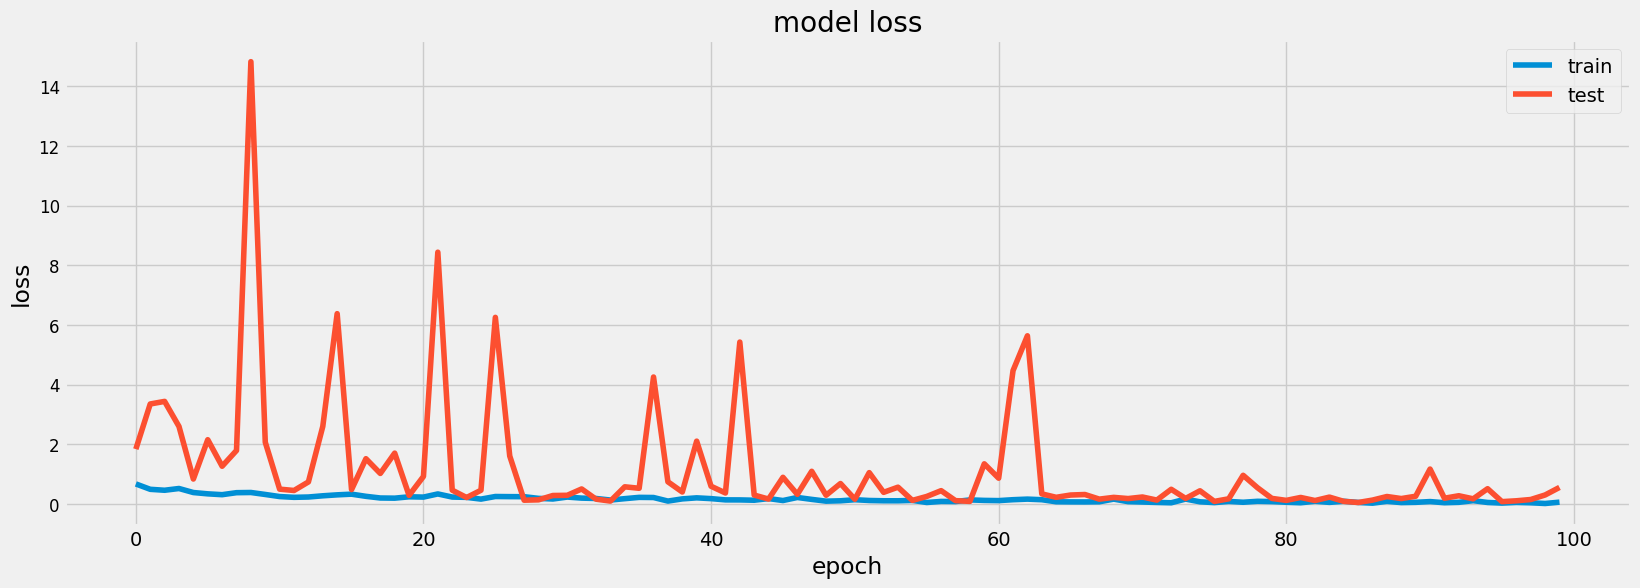

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
predict = model.predict(x_test)

8/8 [==============================] - 5s 248ms/step


In [ ]:
pred = np.argmax(predict, axis=1)

In [ ]:
true = np.argmax(y_test, axis=1)

In [ ]:
accuracy = accuracy_score(true,pred)
print(accuracy)

0.9130434782608695


In [ ]:
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        76
           1       0.99      0.86      0.92        98
           2       0.85      0.90      0.87        79

    accuracy                           0.91       253
   macro avg       0.91      0.92      0.91       253
weighted avg       0.92      0.91      0.91       253



In [ ]:
cm = confusion_matrix(true, pred)
print(cm)

[[76  0  0]
 [ 1 84 13]
 [ 7  1 71]]


In [ ]:
columns = [class_list[0:3]]
r1 = pd.DataFrame(data=cm, columns=columns, index=columns)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="inferno_r", cbar = False)
#for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(labelsize=16)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predito')

NameError: ignored

### EfficientNet

O EfficientNet, introduzido pela primeira vez em Tan e Le, 2019, está entre os modelos mais eficientes (ou seja, exigindo menos FLOPS para inferência) que atinge precisão de ponta em tarefas de aprendizagem de transferência de classificação de imagem e imagens comuns.

O menor modelo base é semelhante ao MnasNet, que alcançou quase SOTA com um modelo significativamente menor. Ao introduzir uma forma heurística de dimensionar o modelo, o EfficientNet fornece uma família de modelos (B0 a B7) que representa uma boa combinação de eficiência e precisão em uma variedade de escalas. Essa heurística de escala (escala composta, detalhes, consulte Tan e Le, 2019) permite que o modelo básico orientado para a eficiência (B0) supere os modelos em todas as escalas, evitando a extensa pesquisa em grade de hiperparâmetros.

Com base no artigo original, as pessoas podem ter a impressão de que EfficientNet é uma família contínua de modelos criados pela escolha arbitrária do fator de escala. No entanto, a escolha de resolução, profundidade e largura também são restritas por muitos fatores:

- Resolução: Resoluções não divisíveis por 8, 16, etc. causam zero-preenchimento próximo aos limites de algumas camadas, o que desperdiça recursos computacionais. Isso se aplica especialmente a variantes menores do modelo, portanto, a resolução de entrada para B0 e B1 é escolhida como 224 e 240.
- Profundidade e largura: os blocos de construção do EfficientNet exigem que o tamanho do canal seja múltiplo de 8.
- Limite de recursos: A limitação de memória pode causar gargalos na resolução quando a profundidade e a largura ainda podem aumentar. Em tal situação, aumentar a profundidade e/ou largura, mas manter a resolução, ainda pode melhorar o desempenho.

Como resultado, a profundidade, a largura e a resolução de cada variante dos modelos EfficientNet são escolhidas a dedo e comprovadamente produzem bons resultados, embora possam estar significativamente fora da fórmula de escala composta. Portanto, a implementação de keras (detalhada abaixo) fornece apenas esses 8 modelos, B0 a B7, em vez de permitir a escolha arbitrária dos parâmetros de largura/profundidade/resolução.

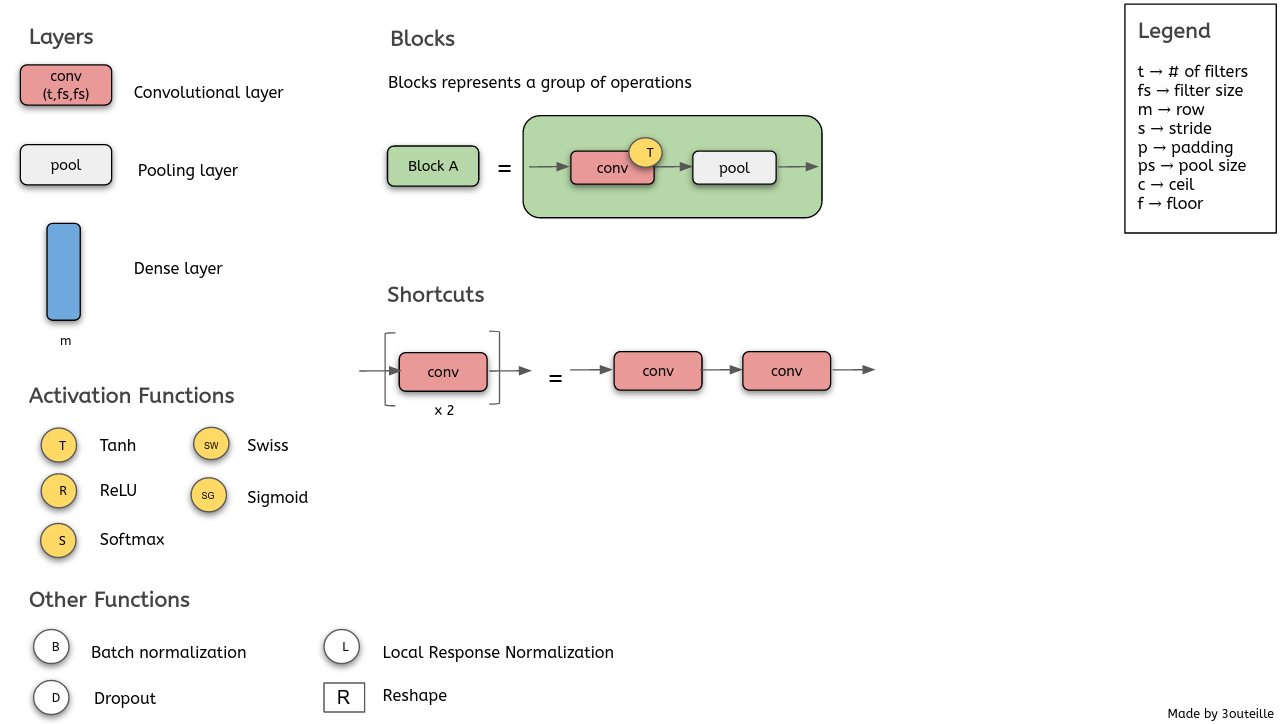

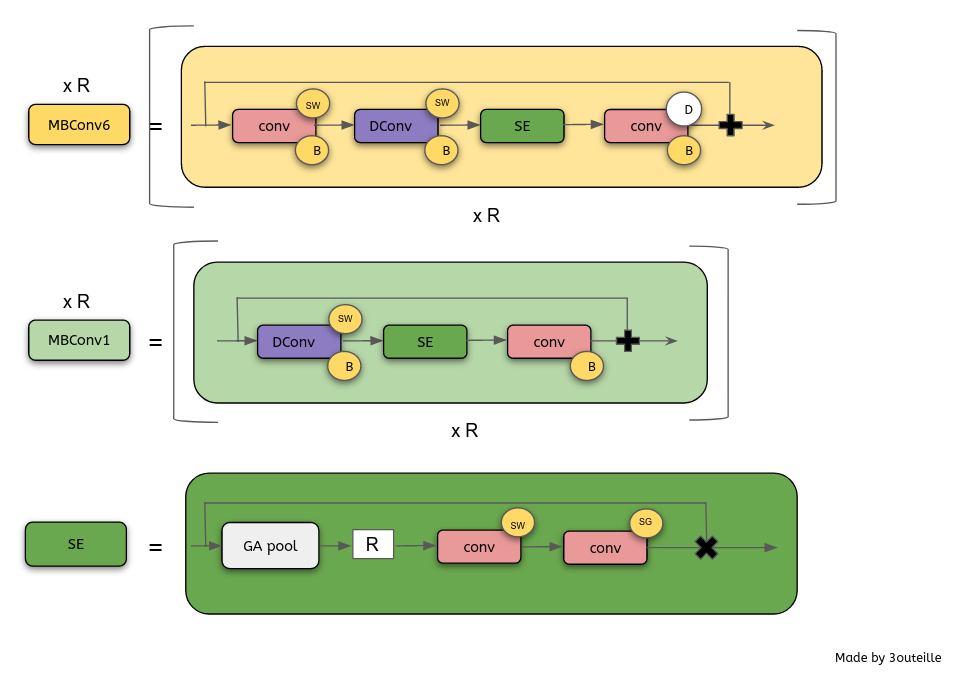

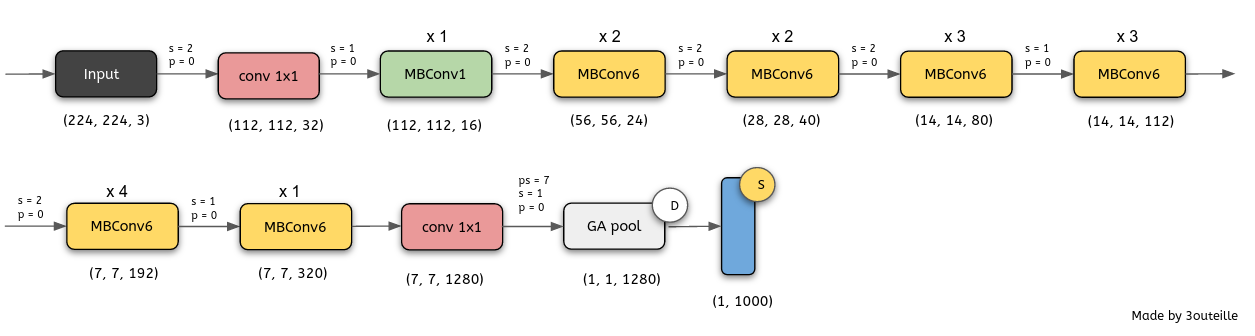

Da mesma forma que fizemos com Densenet:

Então, usaremos o InceptionV3 com pesos imagenet para extração de recursos:

In [ ]:
from keras.applications import EfficientNetB0
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
new_input = Input(shape=x_train.shape[1:])

In [ ]:
conv_base = EfficientNetB0(include_top=False,
                     weights='imagenet',
                     input_tensor=new_input)

Também adicionaremos algumas camadas densas após a última camada do InceptionV3:

In [ ]:
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(2048, activation='relu')(top_model)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dense(32, activation='relu')(top_model)
output_layer = Dense(n_cls, activation='softmax')(top_model)

model = Model(inputs=conv_base.input, outputs=output_layer)

model.compile(optimizer=Adam(lr=0.00001, decay=1e-6), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 300, 300, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 300, 300, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 block3a_dwconv_pad (ZeroPaddin  (None, 79, 79, 144)  0          ['block3a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 38, 38, 144)  3600       ['block3a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block3a_bn (BatchNormalization  (None, 38, 38, 144)  576        ['block3a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3a_a

Após a compilação, vamos treinar nossa rede pré-treinada:

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=16, epochs=100, validation_split=0.30)

Epoch 1/100
34/34 [==============================] - 15s 180ms/step - loss: 0.5267 - accuracy: 0.7826 - val_loss: 1.9027 - val_accuracy: 0.2588
Epoch 2/100
34/34 [==============================] - 4s 120ms/step - loss: 0.0648 - accuracy: 0.9887 - val_loss: 2.1065 - val_accuracy: 0.2588
Epoch 3/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0304 - accuracy: 0.9924 - val_loss: 1.7554 - val_accuracy: 0.2588
Epoch 4/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 1.8459 - val_accuracy: 0.2588
Epoch 5/100
34/34 [==============================] - 4s 121ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 1.7764 - val_accuracy: 0.2588
Epoch 6/100
34/34 [==============================] - 4s 120ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 1.9009 - val_accuracy: 0.2588
Epoch 7/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 2.2308 - val_accuracy: 0.258

Por fim, podemos plotar as curvas de precisão e perda e verificar a precisão dos dados de teste:

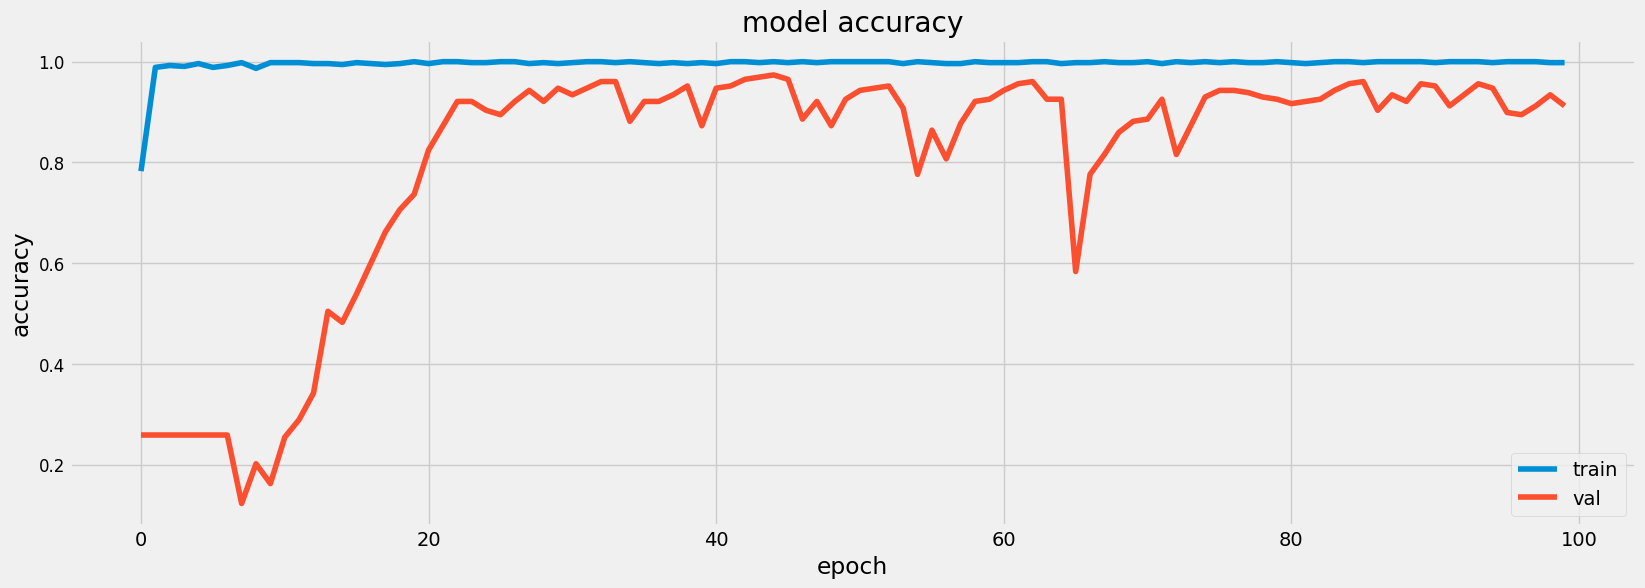

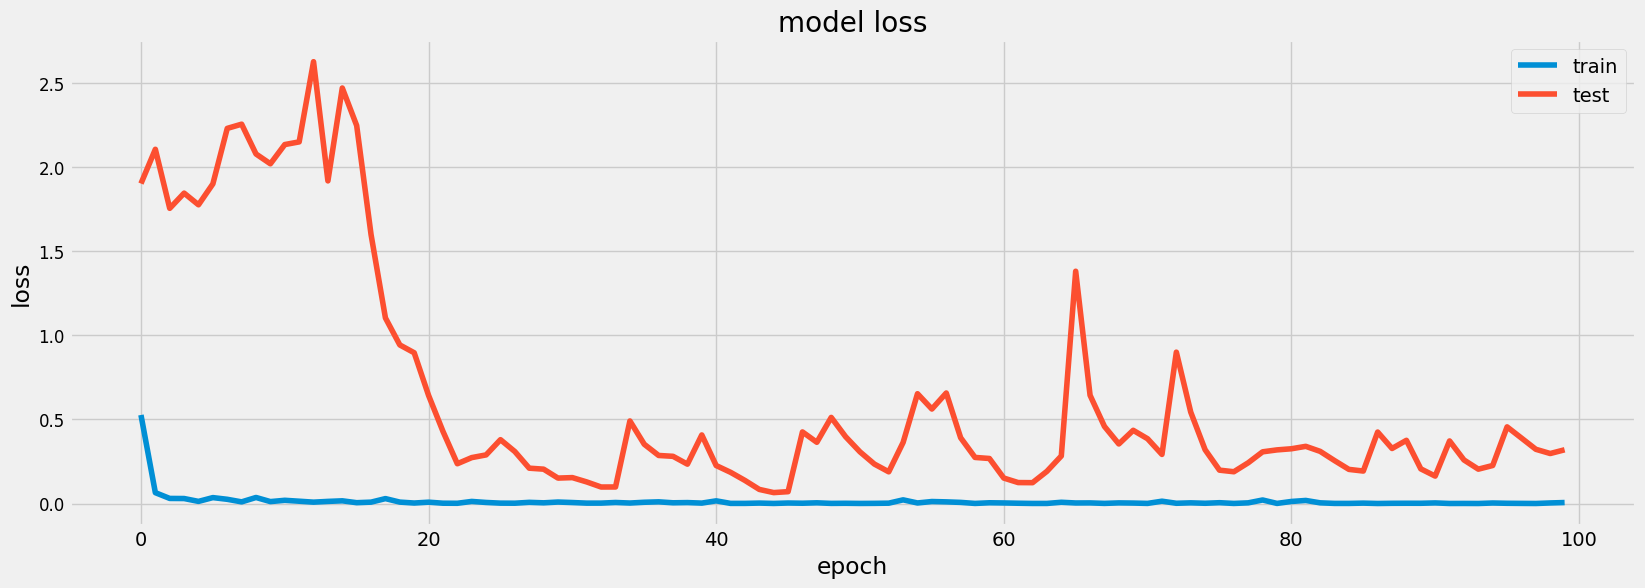

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
predict = model.predict(x_test)

8/8 [==============================] - 3s 103ms/step


In [ ]:
pred = np.argmax(predict, axis=1)

In [ ]:
true = np.argmax(y_test, axis=1)

In [ ]:
accuracy = accuracy_score(true,pred)
print(accuracy)

0.9051383399209486


In [ ]:
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        76
           1       0.93      0.86      0.89        98
           2       0.90      0.87      0.88        79

    accuracy                           0.91       253
   macro avg       0.90      0.91      0.91       253
weighted avg       0.91      0.91      0.90       253



In [ ]:
cm = confusion_matrix(true, pred)
print(cm)

[[76  0  0]
 [ 6 84  8]
 [ 4  6 69]]


Text(0.5, 26.583333333333286, 'Predito')

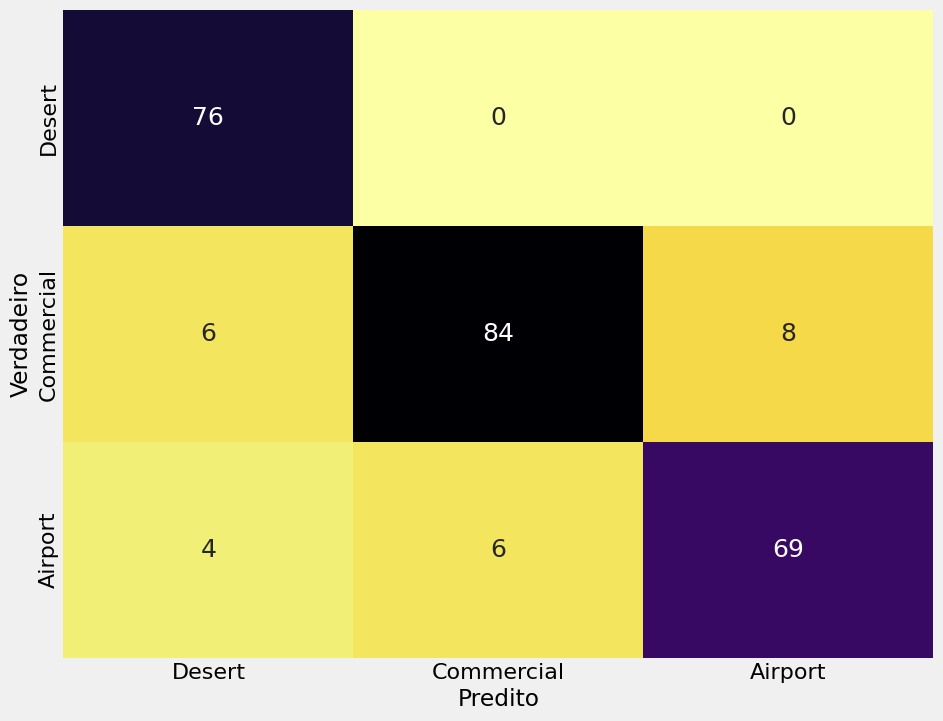

In [ ]:
columns = class_list[0:3]
r1 = pd.DataFrame(data=cm, columns=columns, index=columns)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="inferno_r", cbar = False)
#for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(labelsize=16)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predito')

## Data Augmentation

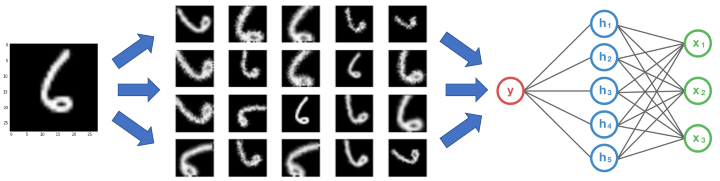

O aumento de dados é uma técnica que pode ser usada para expandir artificialmente o tamanho de um conjunto de treinamento, criando dados modificados a partir do existente. É uma boa prática usar o DA se você quiser evitar o overfitting, ou se o conjunto de dados inicial for muito pequeno para treinar, ou mesmo se você quiser extrair um melhor desempenho do seu modelo.

Vamos deixar isso claro, o aumento de dados não é usado apenas para evitar o overfitting. Em geral, ter um grande conjunto de dados é crucial para o desempenho dos modelos de ML e Deep Learning (DL). No entanto, podemos melhorar o desempenho do modelo aumentando os dados que já temos. Isso significa que o Data Augmentation também é bom para melhorar o desempenho do modelo.

Em geral, DA é frequentemente usado ao construir um modelo DL. Ainda assim, você deve ter em mente que também pode aumentar os dados para os problemas de ML.

Técnicas de aumento de dados


We can apply various changes to the initial data. For example, for images we can use:

- Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg
- Color space transformations – change RGB color channels, intensify any color
- Kernel filters – sharpen or blur an image
- Random Erasing – delete a part of the initial image
- Mixing images – basically, mix images with one another. Might be counterintuitive but it works

## Image Augmentation With ImageDataGenerator

A biblioteca de aprendizado profundo Keras fornece a capacidade de usar o aumento de dados automaticamente ao treinar um modelo.

Isso é obtido usando a classe ImageDataGenerator.

Primeiro, a classe pode ser instanciada e a configuração para os tipos de aumento de dados é especificada por argumentos para o construtor da classe.

Uma variedade de técnicas é suportada, bem como métodos de dimensionamento de pixels. Vamos nos concentrar em cinco tipos principais de técnicas de aumento de dados para dados de imagem; especificamente:

- Mudanças de imagem por meio dos argumentos width_shift_range e height_shift_range.
- A imagem vira por meio dos argumentos horizontal_flip e vertical_flip.
- Rotações de imagem por meio do argumento rotation_range
- Brilho da imagem por meio do argumento de brightness_range.
- Zoom de imagem por meio do argumento zoom_range.

Vamos criar um exemplo rápido de uso de aumento de dados com keras imagedatagenerator:

In [ ]:
from skimage import io
from numpy import expand_dims

Para isso, usaremos uma imagem de teste:

In [ ]:
path = 'drive/My Drive/3-Gize.png'

In [ ]:
img = io.imread(path)

Para corresponder à entrada esperada no datagen, vamos adicionar uma dimensão antes do eixo 0:

In [ ]:
img = img[np.newaxis,:,:,0:3]

Configuramos nosso datagen com algumas operações como rotação e zoom:

In [ ]:
datagen = ImageDataGenerator(rotation_range=90,
                             zoom_range=[0.5,1.0],
                             horizontal_flip=True)
datagen.fit(img)

In [ ]:
it = datagen.flow(img, batch_size=1)

E finalmente plotamos 9 exemplos:

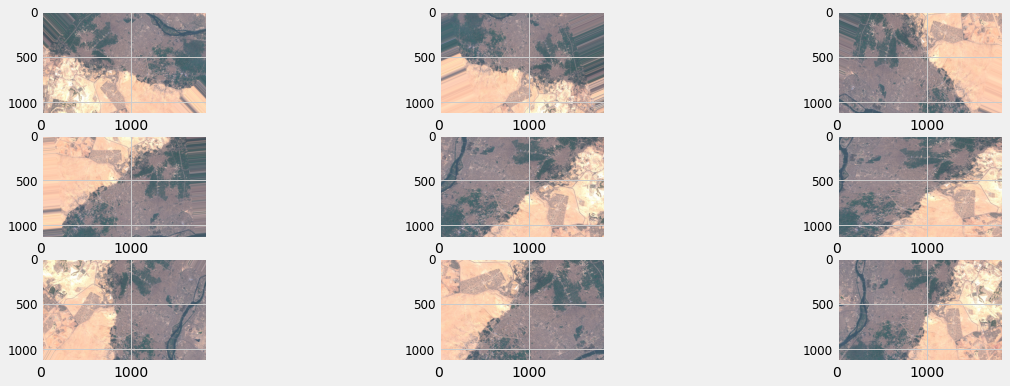

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()


Referências:

https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow

https://github.com/flyyufelix/DenseNet-Keras/blob/master/densenet169.py

https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_efficientnet_fine_tuning.ipynb#scrollTo=GPG3eM5CXufx

https://hackmd.io/@bouteille/HkH1jUArI

https://medium.com/nerd-for-tech/vision-transformers-use-case-satellite-image-classification-without-cnns-2c4dbeb06f87

https://keras.io/examples/vision/image_classification_with_vision_transformer/

https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://neptune.ai/blog/data-augmentation-in-python

https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

https://www.dlology.com/blog/transfer-learning-with-efficientnet/

https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/